### Task3: Сравнение методов классификации

#### Импорт необходимых библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.utils.validation import (
    check_scalar, check_X_y, check_array, check_random_state, check_is_fitted
)
from sklearn.utils.estimator_checks import check_estimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import recall_score, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.multiclass import check_classification_targets
from sklearn.preprocessing import LabelEncoder
from scipy.special import expit

import warnings
warnings.filterwarnings('ignore')

### Разведочный анализ

#### Набор данных

На данном датасете необходимо определить, есть ли у человека заболевание сердца по следующим признакам:

In [2]:
df = pd.read_csv("../data/heart_disease/heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the * hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


#### Чистка данных

Необходимо проверить данные на дубликаты, в случае их наличия удалим лишние строки.

In [6]:
old_len = len(df)
df.drop_duplicates(inplace=True)
len_dropped_rows = old_len - len(df)
if len_dropped_rows > 0:
    print(f'Дубликатов удалено: {len_dropped_rows}')
else:
    print("Дубликаты отсутствуют")

Дубликатов удалено: 723


#### Распределение данных

In [7]:
fig = plt.figure()
fig.set_size_inches(7,7)

<Figure size 700x700 with 0 Axes>

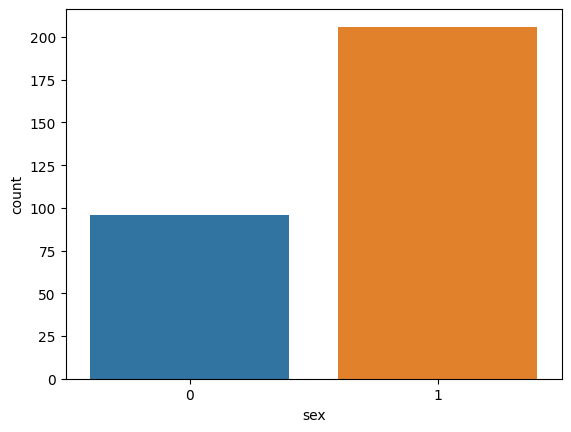

In [8]:
sns.countplot(x = df.sex)
plt.show()

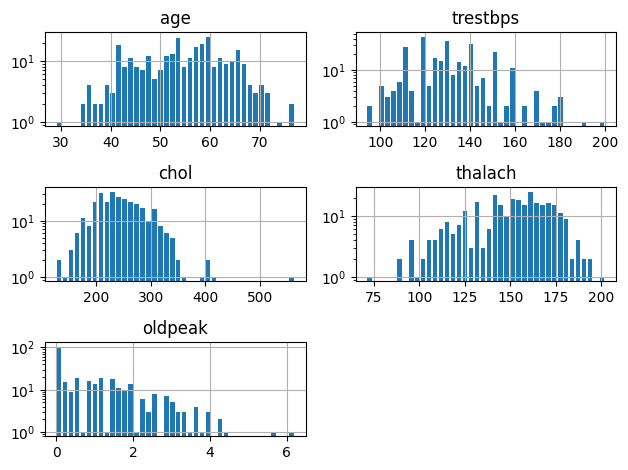

In [9]:
df.hist(column=["age", "trestbps", "chol", "thalach", "oldpeak"], bins=40, log=True, rwidth=0.75)
plt.tight_layout()

<Axes: xlabel='thal', ylabel='count'>

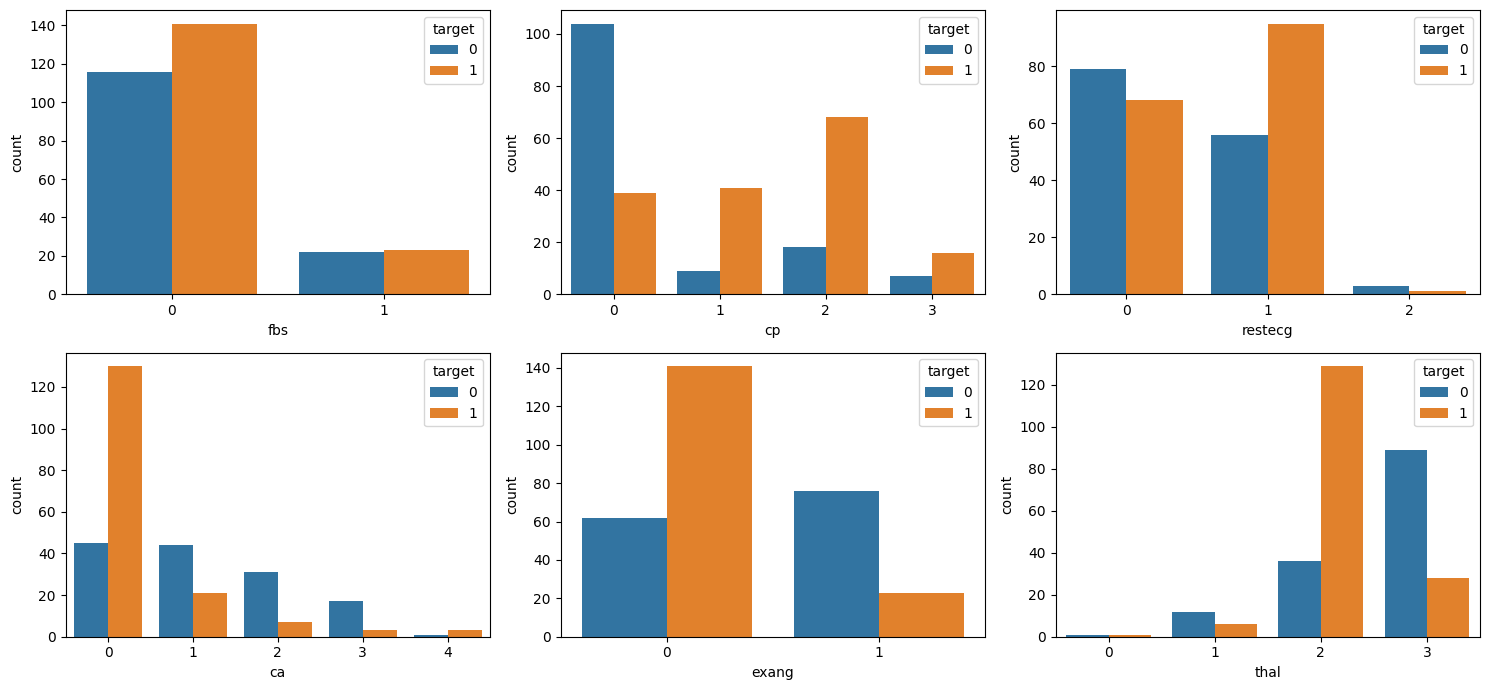

In [10]:
_, axs = plt.subplots(2, 3, figsize=(15, 7), tight_layout=True)
sns.countplot(df, x="fbs", hue="target", ax=axs[0, 0])
sns.countplot(df, x="cp", hue="target", ax=axs[0, 1])
sns.countplot(df, x="restecg", hue="target", ax=axs[0, 2])
sns.countplot(df, x="ca", hue="target", ax=axs[1, 0])
sns.countplot(df, x="exang", hue="target", ax=axs[1, 1])
sns.countplot(df, x="thal", hue="target", ax=axs[1, 2])

#### Корреляция

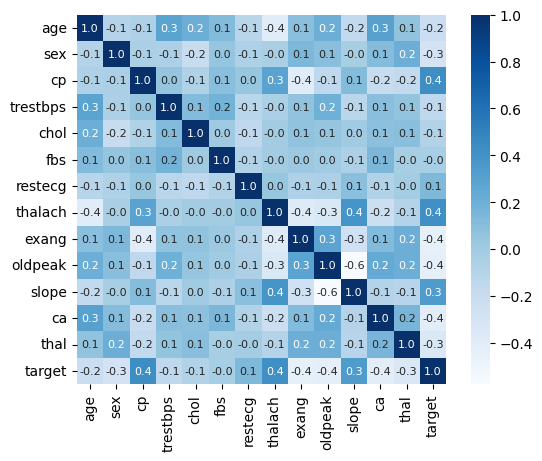

In [11]:
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

У признаков не наблюдается сильной линейной зависимости, поэтому оставляем все как есть.

Разобьем данные на обучающую и тестовую выборку случайным образом.

In [12]:
X, y = df.drop(columns="target", axis=1), df["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Собственные реализации алгоритмов KNN и LogisticRegression

In [13]:
class MyKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors = 3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_, self.y_ = X, y
        return self

    def predict(self, X):
        result = np.empty((X.shape[0],), dtype=self.y_.dtype)
        
        for i, x in enumerate(X): 
            dists = np.linalg.norm(self.X_ - x, axis=1)
            sorted_dists_idx = np.argsort(dists)
            k_neighbor_classes = self.y_[sorted_dists_idx][:self.n_neighbors]
            elems, counts = np.unique(k_neighbor_classes, return_counts=True)
            result[i] = elems[np.argmax(counts)]

        return result

In [14]:
class MyLogisticRegression(BaseEstimator, ClassifierMixin):

    def __init__(self, alpha = 1, *, max_iter = 1000, tol = 1e-4, eta0 = 1):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.eta0 = eta0

    def _fit_binary(self, X, y):
        coef = np.zeros(X.shape[1])
        grad = np.inf
        n_iter = 0
        while n_iter < self.max_iter and np.linalg.norm(grad) > self.tol:
            pred = expit(X @ coef)
            grad = X.T @ (pred - y) + 2 * self.alpha * np.pad(coef[:-1], (0, 1))
            n_iter += 1
            coef -= grad * self.eta0 / n_iter

        return coef[:-1], coef[-1], n_iter

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.n_features_in_ = X.shape[1]
        X = np.column_stack([X, np.ones(X.shape[0])])
        self.coef_ = np.empty((self.classes_.size, self.n_features_in_))
        self.intercept_ = np.empty((self.classes_.size,))
        self.n_iter_ = np.empty((self.classes_.size,))
        for i, c in enumerate(self.classes_):
            self.coef_[i], self.intercept_[i], self.n_iter_[i] = self._fit_binary(X, y == c)

        return self

    def predict(self, X):
        X = check_array(X)
        class_probs = expit(X @ self.coef_.T + self.intercept_)
        most_likely_class_idx = np.argmax(class_probs, axis=1)
        return self.classes_[most_likely_class_idx]

#### Обучение моделей без кросс-валидации и подбора гепер-параметров

In [15]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


In [16]:
knn = MyKNN()
knn.fit(X_train, y_train)
print("MyKNN algorithm")
print("Recall test:")
print(recall_score(knn.predict(X_test), y_test))
print("Recall train:")
print(recall_score(knn.predict(X_train), y_train))

MyKNN algorithm
Recall test:
0.6122448979591837
Recall train:
0.8091603053435115


In [17]:
logistic_regr = MyLogisticRegression()
logistic_regr.fit(X_train, y_train)
print("MyLogisticRegression algorithm")
print("Recall test:")
print(recall_score(logistic_regr.predict(X_test), y_test))
print("Recall train:")
print(recall_score(logistic_regr.predict(X_train), y_train))

MyLogisticRegression algorithm
Recall test:
0.8823529411764706
Recall train:
0.8372093023255814


#### Обучение моделей с кросс-валидацией и подбором гипер-параметров

In [18]:
def train_with_param_cv(estimator, estimator_name, param_grid, scoring):
    model = Pipeline([("scaler", StandardScaler()), ("estimator", estimator)])
    param_grid = {f"estimator__{name}": val for name, val in param_grid.items()}
    grid_search = GridSearchCV(
        model,
        param_grid,
        scoring=scoring,
    )
    grid_search.fit(X_train, y_train)

    print(estimator_name)
    print(
        "Лучшие гиперпараметры:",
        {name.removeprefix("estimator__") : val for name, val in grid_search.best_params_.items()}
    )
    print('Лучший recall:', grid_search.best_score_)
    
    ax = ConfusionMatrixDisplay.from_estimator(
            grid_search.best_estimator_,
            X_test,
            y_test,
            cmap=plt.cm.Blues,
        ).ax_
    ax.set_title("Confusion matrix")
    ax.plot()

KNN
Лучшие гиперпараметры: {'n_neighbors': 13}
Лучший recall: 0.9381538461538461


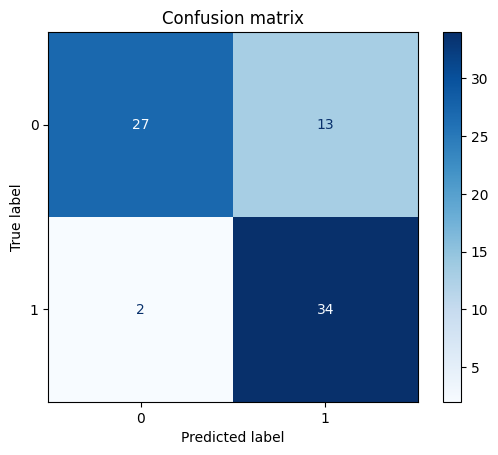

In [19]:
train_with_param_cv(
    MyKNN(),
    "KNN",
    {"n_neighbors": [i for i in range(2, 20)]},
    "recall"
)

При выборе параметра {'n_neighbors': 13} получаем хорошее качество предсказаний на предложенных данных (recall = 0,94), но количество предсказаний False Positive достаточно высокое.

MyLogisticRegression
Лучшие гиперпараметры: {'alpha': 2, 'eta0': 0.1, 'tol': 1e-06}
Лучший recall: 0.9147692307692307


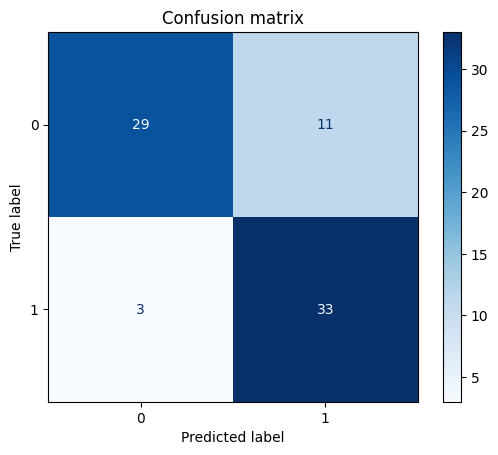

In [20]:
train_with_param_cv(
    MyLogisticRegression(),
    "MyLogisticRegression",
        {
        "alpha": [0.01, 0.1, 1, 2, 3],
        "tol": [1e-6, 1e-5, 1e-4, 1e-3],
        "eta0": [0.1, 1, 10, 25],
    },
    "recall"
)

При выборе параметров {'alpha': 2, 'eta0': 0.1, 'tol': 1e-06} получаем хорошее качество предсказаний на предложенных данных. У MyLogisticRegression recall (0.91) меньше, чем recall (0,94) у MyKNN модели, но тем не менее количество False Positive результатов ниже.

Рассмотрим качество предсказаний библиотечных реализаций sklearn:

KNeighborsClassifier
Лучшие гиперпараметры: {'n_neighbors': 7}
Лучший recall: 0.8907692307692308


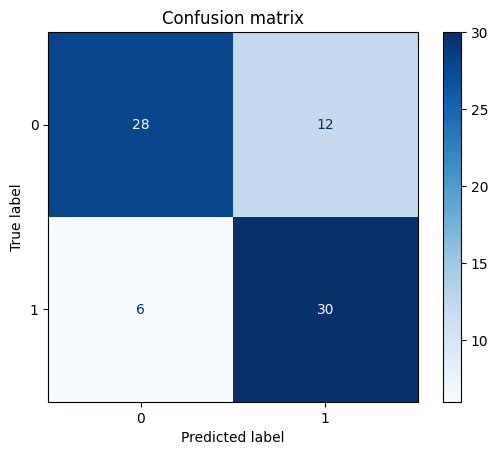

In [21]:
from sklearn.neighbors import KNeighborsClassifier

train_with_param_cv(
    KNeighborsClassifier(),
    "KNeighborsClassifier",
    {
        "n_neighbors": [i for i in range(2, 10)]
    },
    "recall"
)

LogisticRegression
Лучшие гиперпараметры: {'C': 0.1, 'max_iter': 100, 'tol': 1e-06}
Лучший recall: 0.9224615384615384


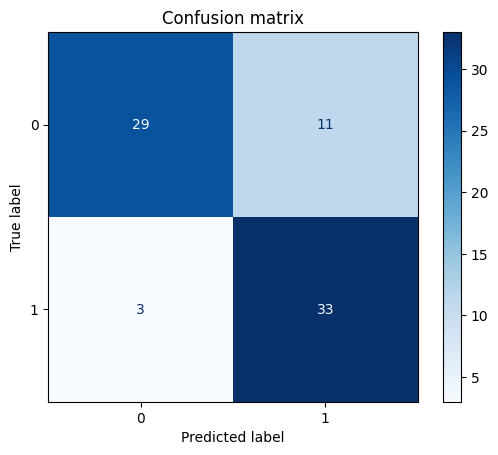

In [22]:
from sklearn.linear_model import LogisticRegression

train_with_param_cv(
    LogisticRegression(),
    "LogisticRegression",
    {
        "tol": [1e-6, 1e-5, 1e-4],
        "C": [0.1, 0.5, 0.9, 1, 2],
        "max_iter": [100, 200, 300],
    },
    "recall"
)

GaussianNB
Лучшие гиперпараметры: {'var_smoothing': 0.001}
Лучший recall: 0.8513846153846153


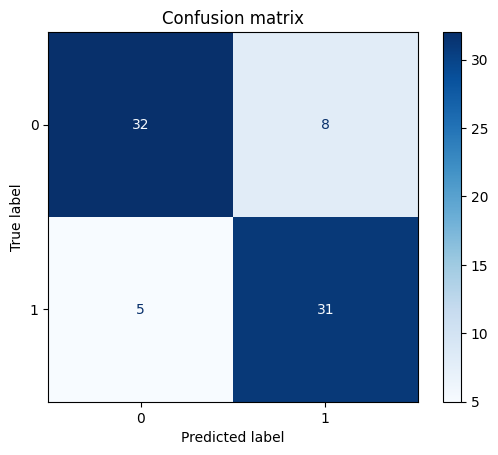

In [23]:
from sklearn.naive_bayes import GaussianNB

train_with_param_cv(
    GaussianNB(),
    "GaussianNB",
    {
        "var_smoothing": [1e-3, 1e-5, 1e-7]
    },
    "recall"
)

DecisionTreeClassifier
Лучшие гиперпараметры: {'criterion': 'entropy', 'max_depth': 500, 'max_leaf_nodes': 400, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}
Лучший recall: 0.9141538461538461


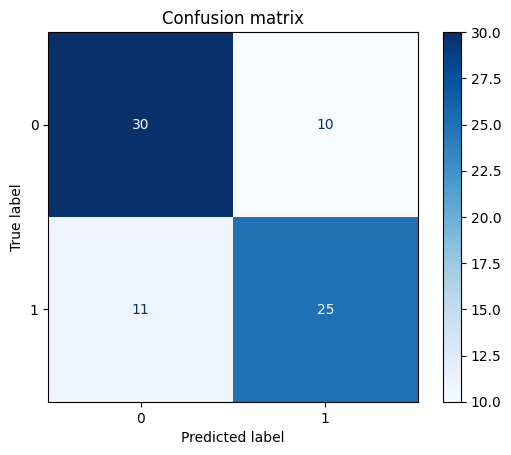

In [24]:
from sklearn.tree import DecisionTreeClassifier

train_with_param_cv(
    DecisionTreeClassifier(),
    "DecisionTreeClassifier",
    {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [None, 50, 100, 500],
        "min_samples_split": [2, 3, 5],
        "min_samples_leaf": [1, 2, 5],
        "min_weight_fraction_leaf": [0, 0.01, 0.1],
        "max_leaf_nodes": [None, 50, 100, 400],
    },
    "recall"
)

 SVC
Лучшие гиперпараметры: {'C': 0.01, 'coef0': 0, 'gamma': 'scale', 'kernel': 'poly', 'tol': 1e-06}
Лучший recall: 1.0


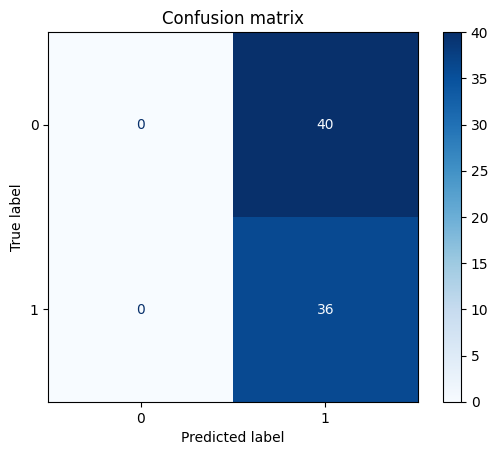

In [25]:
from sklearn.svm import SVC

train_with_param_cv(
    SVC(),
    " SVC",
    {
        "C": [0.01, 0.1, 1],
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "gamma": ["scale", "auto"],
        "coef0": [0, 1],
        "tol": [1e-6, 1e-5, 1e-4],
    },
    "recall"
)

#### Вывод
1. Судя по confusion matrices, лучше всего себя показали GaussianNB и DecisionTreeClassifier, у данных моделей наименьший False Positive результат.
2. У остальных моделей результат False Positive хуже, но тем не менее значение recall достаточно высокое, поэтому их тоже можно использовать для решения задачи классификации на данном датасете.

### Дополнительный датасет

Был выбран датасет для прогнозирования диабета. Набор представляет собой совокупность медицинских и демографических данных пациентов.
* gender - пол 
* age - возраст
* hepertension - гипертония (0 - отсутствует, 1 - присутствует)
* heart_disease - сердечные болень (0 - отсутствует, 1 - присутствует)
* smoking_history - история курения
* bmi - индекс массы тела (ИМТ)
* HbA1c_level - уровень гликированного гемоглобина
* blood_glucose_level - уровень глюкозы в крови
* diabetes - статус диабета (0 - отсутствует, 1 - присутствует)

Так как некоторые модели обучаются на таком количестве данных достаточно долго, возьмем каждую вторую запись в датасете

In [26]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df = df.iloc[::2]
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
8,Male,42.0,0,0,never,33.64,4.8,145,0


In [27]:
df.shape

(50000, 9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               50000 non-null  object 
 1   age                  50000 non-null  float64
 2   hypertension         50000 non-null  int64  
 3   heart_disease        50000 non-null  int64  
 4   smoking_history      50000 non-null  object 
 5   bmi                  50000 non-null  float64
 6   HbA1c_level          50000 non-null  float64
 7   blood_glucose_level  50000 non-null  int64  
 8   diabetes             50000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.4+ MB


In [29]:
df.describe().round(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,41.89,0.08,0.04,27.29,5.53,138.26,0.09
std,22.57,0.26,0.20,6.62,1.07,40.81,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.60,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,88.76,9.00,300.00,1.00


#### Чистка данных

Необходимо проверить данные на дубликаты, в случае их наличия удалим лишние строки.

In [30]:
old_len = len(df)
df.drop_duplicates(inplace=True)
len_dropped_rows = old_len - len(df)
if len_dropped_rows > 0:
    print(f'Дубликатов удалено: {len_dropped_rows}')
else:
    print("Дубликаты отсутствуют")

Дубликатов удалено: 1078


#### Распределение данных

In [31]:
fig = plt.figure()
fig.set_size_inches(7,7)

<Figure size 700x700 with 0 Axes>

<Axes: xlabel='gender', ylabel='count'>

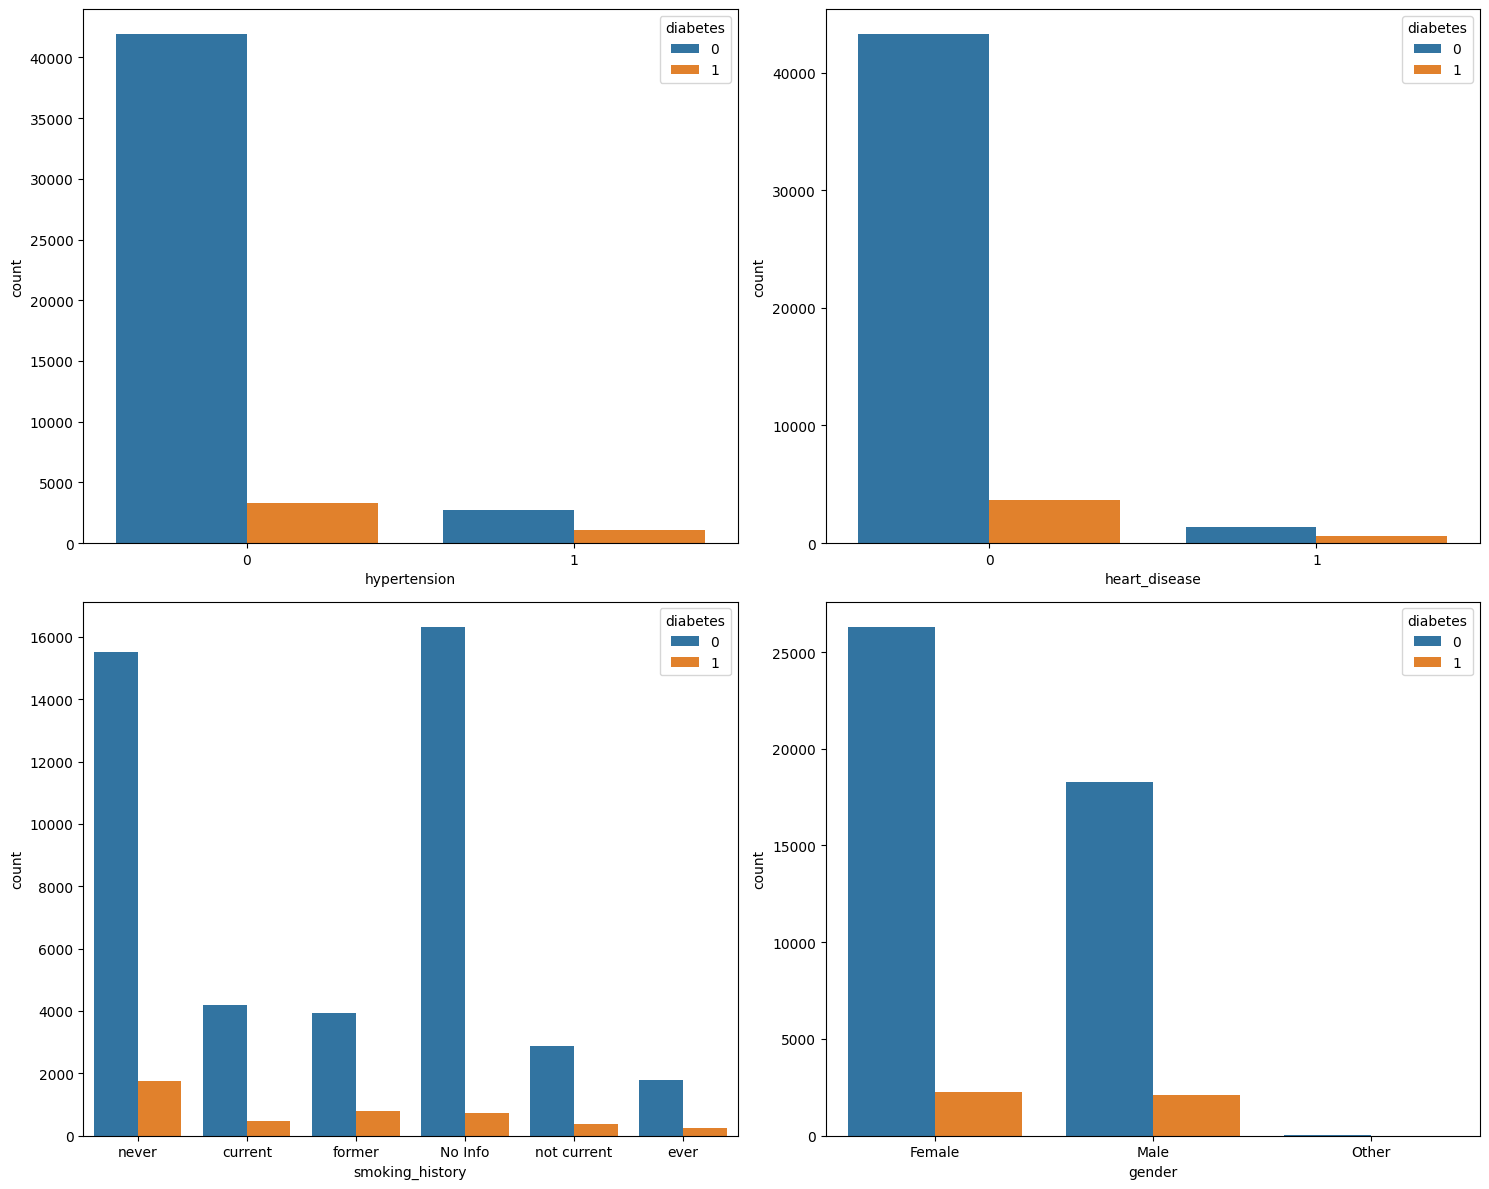

In [32]:
_, axs = plt.subplots(2, 2, figsize=(15, 12), tight_layout=True)
sns.countplot(df, x="hypertension", hue="diabetes", ax=axs[0, 0])
sns.countplot(df, x="heart_disease", hue="diabetes", ax=axs[0, 1])
sns.countplot(df, x="smoking_history", hue="diabetes", ax=axs[1, 0])
sns.countplot(df, x="gender", hue="diabetes", ax=axs[1, 1])


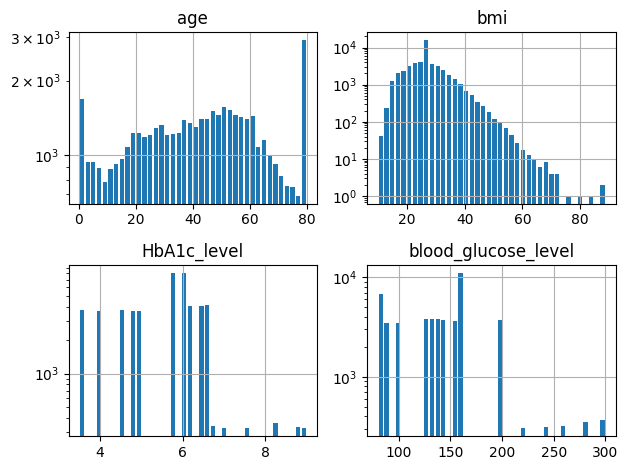

In [33]:
df.hist(column=["age", "bmi", "HbA1c_level", "blood_glucose_level"], bins=40, log=True, rwidth=0.75)
plt.tight_layout()

#### Корреляция

Для анализа зависимостей необходимо преобразовать строковые атрибуты в числа.

In [34]:
LE = LabelEncoder()
df["smoking_history"] = LE.fit_transform(df["smoking_history"])
df["gender"] = LE.fit_transform(df["gender"])

print(df.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
2       1  28.0             0              0                4  27.32   
4       1  76.0             1              1                1  20.14   
6       0  44.0             0              0                4  19.31   
8       1  42.0             0              0                4  33.64   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
2          5.7                  158         0  
4          4.8                  155         0  
6          6.5                  200         1  
8          4.8                  145         0  


<Axes: >

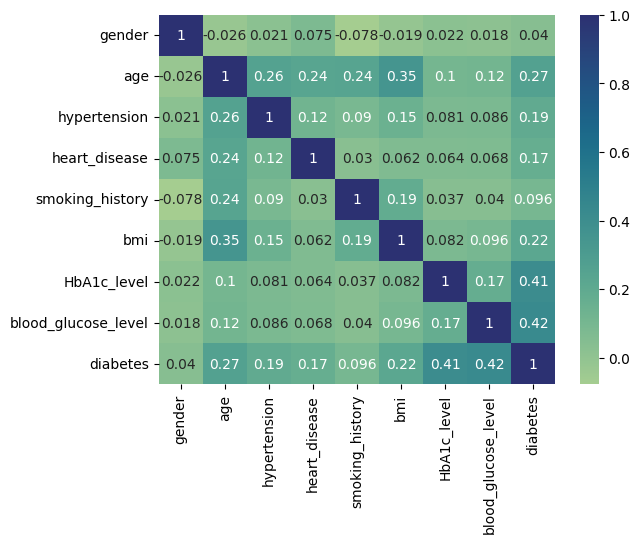

In [35]:
sns.heatmap(df.corr(), annot=True, cmap="crest")

У признаков не наблюдается сильной линейной зависимости, поэтому оставляем все как есть.

In [36]:
X, y = df.drop(columns="diabetes", axis=1), df["diabetes"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Обучение моделей без кросс-валидации и подбора гепер-параметров

In [37]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [38]:
knn = MyKNN()
knn.fit(X_train, y_train)
print("MyKNN algorithm")
print("Recall test:")
print(recall_score(knn.predict(X_test), y_test))
print("Recall train:")
print(recall_score(knn.predict(X_train), y_train))

MyKNN algorithm
Recall test:


0.8027777777777778
Recall train:
0.9170159262363788


In [39]:
logistic_regr = MyLogisticRegression()
logistic_regr.fit(X_train, y_train)
print("MyLogisticRegression algorithm")
print("Recall test:")
print(recall_score(logistic_regr.predict(X_test), y_test))
print("Recall train:")
print(recall_score(logistic_regr.predict(X_train), y_train))

MyLogisticRegression algorithm
Recall test:
0.190464048954615
Recall train:
0.18720054757015742


Без подбора гиперпараметров результат MyLogisticRegression очень плохой.

#### Обучение моделей с кросс-валидацией и подбором гипер-параметров

KNN
Лучшие гиперпараметры: {'n_neighbors': 5}
Лучший recall: 0.6021571648690294


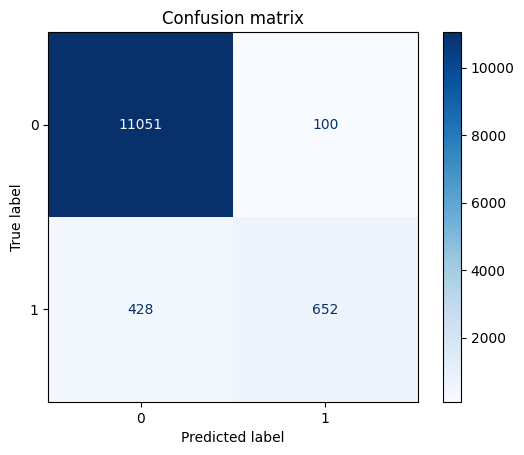

In [40]:
train_with_param_cv(
    MyKNN(),
    "KNN",
    {"n_neighbors": [2, 5, 8]},
    "recall"
)

MyLogisticRegression
Лучшие гиперпараметры: {'alpha': 0.1, 'eta0': 0.1, 'tol': 1e-05}
Лучший recall: 0.6761171032357474


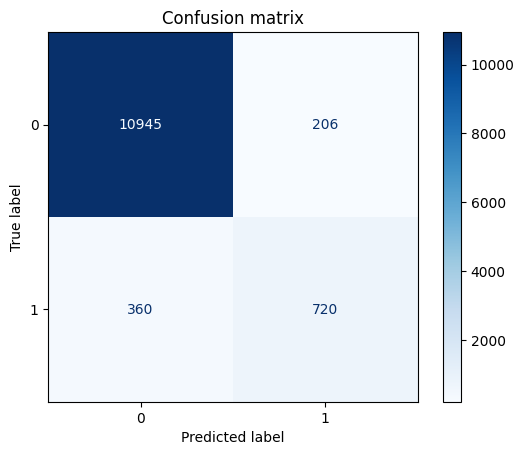

In [41]:
train_with_param_cv(
    MyLogisticRegression(),
    "MyLogisticRegression",
        {
        "alpha": [0.1, 1],
        "tol": [1e-5, 1e-4],
        "eta0": [0.1, 1],
    },
    "recall"
)

Рассмотрим качество предсказаний библиотечных реализаций sklearn:

KNeighborsClassifier
Лучшие гиперпараметры: {'n_neighbors': 5}
Лучший recall: 0.6021571648690294


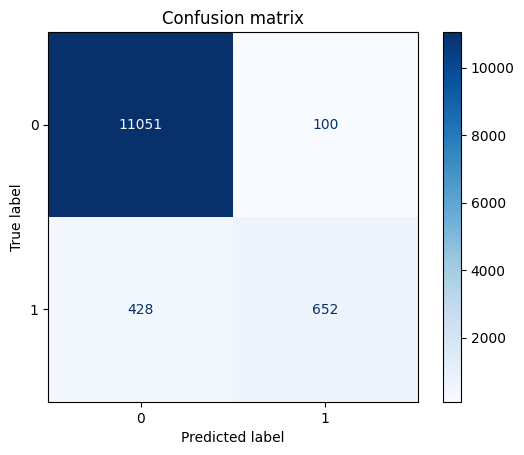

In [42]:
from sklearn.neighbors import KNeighborsClassifier

train_with_param_cv(
    KNeighborsClassifier(),
    "KNeighborsClassifier",
    {
        "n_neighbors": [2, 5, 8]
    },
    "recall"
)

LogisticRegression
Лучшие гиперпараметры: {'C': 2, 'max_iter': 100, 'tol': 1e-06}
Лучший recall: 0.6283513097072418


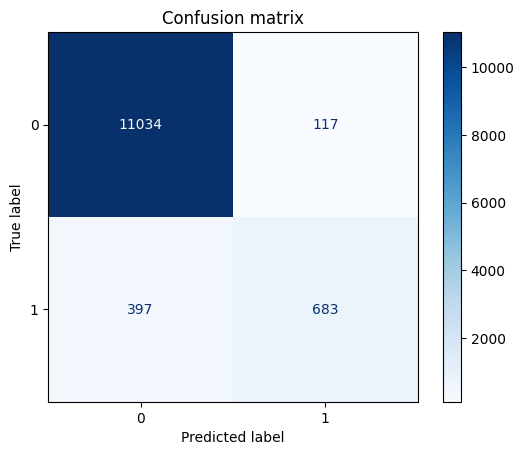

In [43]:
from sklearn.linear_model import LogisticRegression

train_with_param_cv(
    LogisticRegression(),
    "LogisticRegression",
    {
        "tol": [1e-6, 1e-5, 1e-4],
        "C": [0.1, 0.5, 0.9, 1, 2],
        "max_iter": [100, 200],
    },
    "recall"
)

GaussianNB
Лучшие гиперпараметры: {'var_smoothing': 0.001}
Лучший recall: 0.6471494607087827


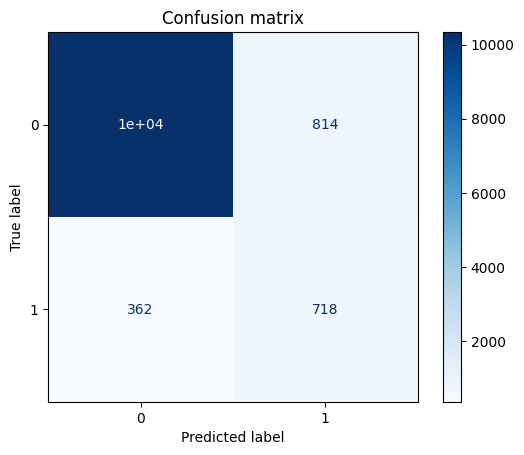

In [44]:
from sklearn.naive_bayes import GaussianNB

train_with_param_cv(
    GaussianNB(),
    "GaussianNB",
    {
        "var_smoothing": [1e-3, 1e-5, 1e-7]
    },
    "recall"
)

DecisionTreeClassifier
Лучшие гиперпараметры: {'criterion': 'gini', 'max_leaf_nodes': None, 'splitter': 'best'}
Лучший recall: 0.7442218798151001


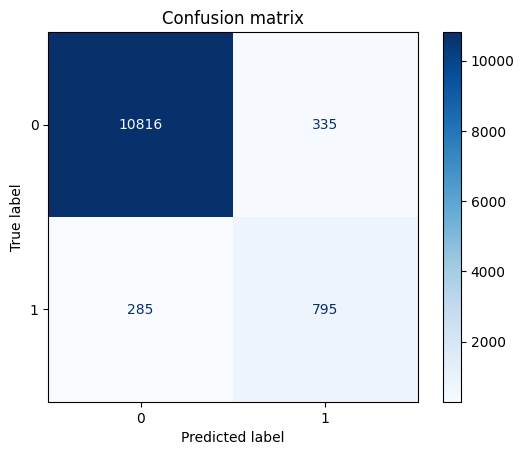

In [45]:
from sklearn.tree import DecisionTreeClassifier

train_with_param_cv(
    DecisionTreeClassifier(),
    "DecisionTreeClassifier",
    {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_leaf_nodes": [None, 50, 100, 500],
    },
    "recall"
)

 SVC
Лучшие гиперпараметры: {'kernel': 'linear'}
Лучший recall: 0.5916795069337443


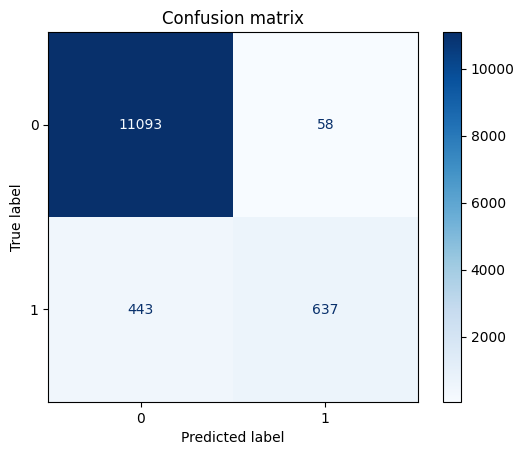

In [46]:
from sklearn.svm import SVC

train_with_param_cv(
    SVC(),
    " SVC",
    {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
    },
    "recall"
)

#### Вывод
1. Судя по confusion matrices, хуже всех себя показали GaussianNB и DecisionTreeClassifier, у данных моделей наибольший False Positive результат. У остальных моделей результат False Positive лучше
2. Тем не менее все модели приемлемы для использования на данном датасете, но они показали себя гораздо хуже, чем на датасете `heart_disease`, возможно из-за того, что размерность данного датасета больше в 50 раз.